In [2]:
from pathlib import Path
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data_analysis.utils import user
from data.paths.parquet_paths import USER

In [6]:
pd.set_option("display.max_columns", 100)

In [4]:
user_df = pd.read_parquet(str(USER))
user_df = user.prepare_user_df(user_df)
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             10000 non-null  object        
 1   name                10000 non-null  object        
 2   review_count        10000 non-null  int32         
 3   yelping_since       10000 non-null  datetime64[ns]
 4   friends             10000 non-null  object        
 5   useful              10000 non-null  int32         
 6   funny               10000 non-null  int32         
 7   cool                10000 non-null  int32         
 8   fans                10000 non-null  int32         
 9   elite               0 non-null      object        
 10  average_stars       10000 non-null  float32       
 11  compliment_hot      10000 non-null  int32         
 12  compliment_more     10000 non-null  int32         
 13  compliment_profile  10000 non-null  int32      

### Variables - helpers

In [8]:
user_id = 'user_id'
name = 'name'
review_count = 'review_count'
yelping_since = 'yelping_since'
useful = 'useful'
funny = 'funny'
cool = 'cool'
elite = 'elite'
friends = 'friends'
fans = 'fans'
average_stars = 'average_stars'
compliment_hot = 'compliment_hot'
compliment_more = 'compliment_more'
compliment_profile = 'compliment_profile'
compliment_cute = 'compliment_cute'
compliment_list = 'compliment_list'
compliment_note = 'compliment_note'
compliment_plain = 'compliment_plain'
compliment_cool = 'compliment_cool'
compliment_funny = 'compliment_funny'
compliment_writer = 'compliment_writer'
compliment_photos = 'compliment_photos'

In [7]:
user_df.sample(1)

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
8047,xoIrq4ucniCVPktICYur_Q,Michael,19,2010-05-07 19:41:15,"[B5uVDRRXqp2yLXh3hXQPHw, v3YdviaQC4ho-yQRTr1xm...",34,5,14,2,None,4.58,1,0,0,0,0,2,1,1,1,0,0


In [10]:
user_df[yelping_since] = pd.to_datetime(user_df[yelping_since])

In [19]:
user_df['yelping_since_bin'] = pd.cut(user_df[yelping_since], 40)

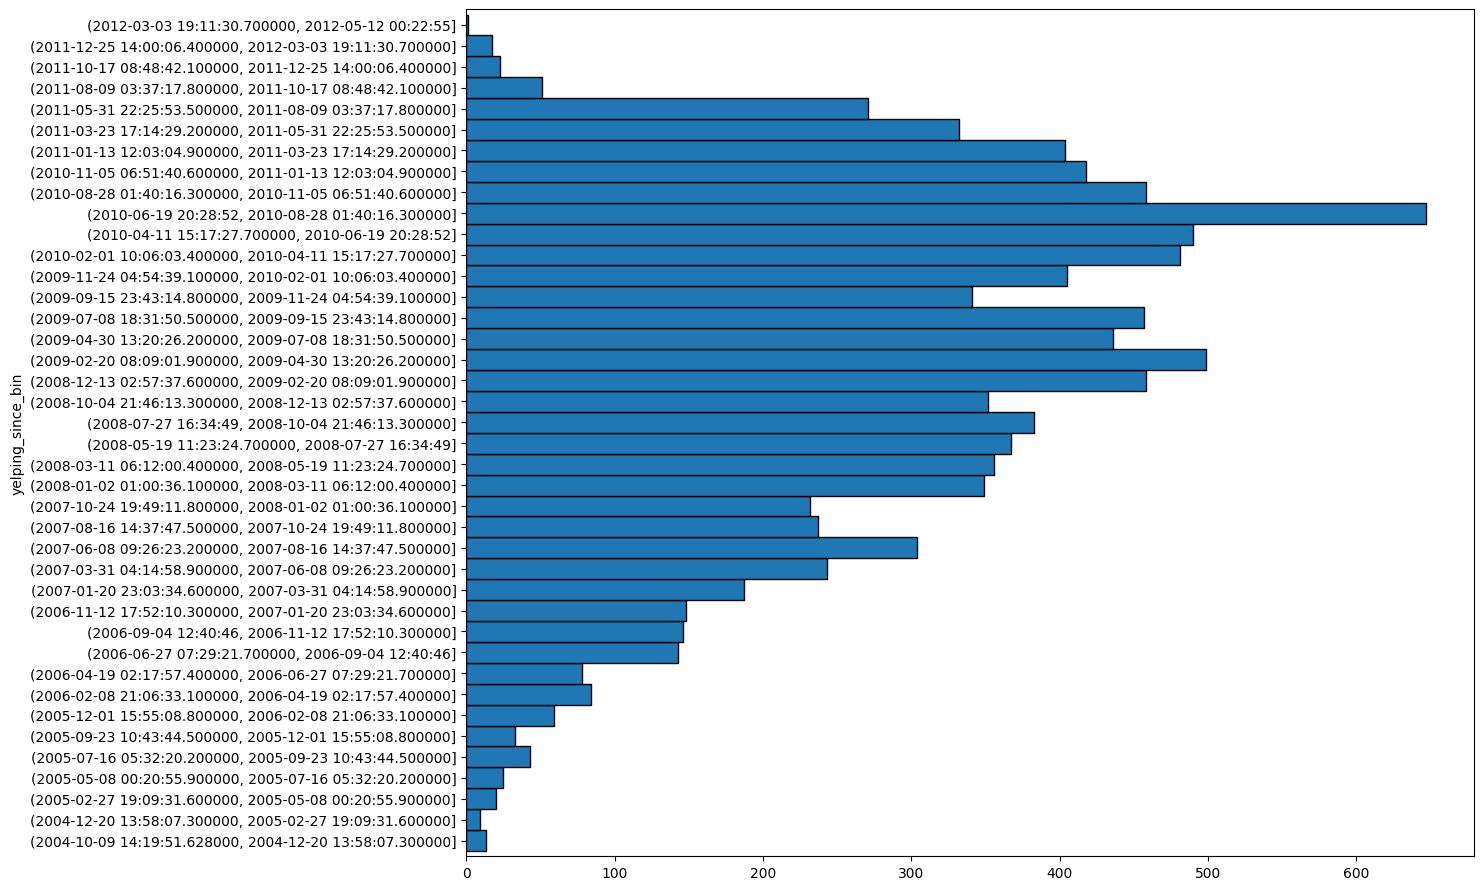

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(13, 11))
user_df.groupby('yelping_since_bin')['user_id'].count().plot(kind='barh', width=1, edgecolor='black')
# ax.set_title('Reivew count per date')
# ax.set_xlabel('Review count', fontsize=16)
# ax.set_ylabel('Date bin', fontsize=16)
plt.show()
